In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().TrigObj

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
leading_mu, subleading_mu = {}, {}

for i in tqdm(range(len(si))):
    leading_pt = [heapq.nlargest(2, si[i])[0]]
    subleading_pt = [heapq.nlargest(2, si[i])[1]]
    
    if len(leading_mu) == 0:
        leading_mu['pt'] = leading_pt
        subleading_mu['pt'] = subleading_pt
        
    else:
        leading_mu['pt'] = np.concatenate([leading_mu['pt'], leading_pt])
        subleading_mu['pt'] = np.concatenate([subleading_mu['pt'], subleading_pt])

NameError: name 'si' is not defined

In [5]:
leading_mu, subleading_mu = {}, {}

for i in tqdm(range(10)):
    print(sorted(si[i], reverse=True))

  0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'si' is not defined

In [10]:
print(ak.argmax(si, axis=1, keepdims=True))

[[5], [5], [5], [0], [1], [7], [5], [3], ... [1], [1], [6], [4], [0], [1], [1], [0]]


In [11]:
def data(cha1,cha2):
    jet1, jet2 = (events_4mu[cha1].id == 1), (events_2mu2e[cha2].id ==1)
    ele1, ele2 = (events_4mu[cha1].id == 11), (events_2mu2e[cha2].id ==11)
    mu1, mu2 = (events_4mu[cha1].id == 13), (events_2mu2e[cha2].id ==13)
    ta1, ta2 = (events_4mu[cha1].id == 15), (events_2mu2e[cha2].id ==15)
    
    return events_4mu[cha1][jet1], events_4mu[cha1][ele1], events_4mu[cha1][mu1], events_4mu[cha1][ta1], events_2mu2e[cha2][jet2], events_2mu2e[cha2][ele2], events_2mu2e[cha2][mu2], events_2mu2e[cha2][ta2]

In [6]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=50, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

In [8]:
def label(vari):
    ax[0][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[0][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[1][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[1][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[2][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[2][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[3][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[3][1].set_xlabel('TrigObj {0}'.format(vari))
    ax[4][0].set_xlabel('TrigObj {0}'.format(vari))
    ax[4][1].set_xlabel('TrigObj {0}'.format(vari))
    
    ax[0][0].set_title('4mu_500GeV_5GeV_0p08mm',color='r')
    ax[0][1].set_title('2mu2e_500GeV_5GeV_0p08mm',color='b')
    ax[1][0].set_title('4mu_500GeV_5GeV_0p8mm',color='r')
    ax[1][1].set_title('2mu2e_500GeV_5GeV_0p8mm',color='b')
    ax[2][0].set_title('4mu_500GeV_5GeV_8p0mm',color='r')
    ax[2][1].set_title('2mu2e_500GeV_5GeV_8p0mm',color='b')
    ax[3][0].set_title('4mu_500GeV_5GeV_40p0mm',color='r')
    ax[3][1].set_title('2mu2e_500GeV_5GeV_40p0mm',color='b')
    ax[4][0].set_title('4mu_500GeV_5GeV_80p0mm',color='r')
    ax[4][1].set_title('2mu2e_500GeV_5GeV_80p0mm',color='b')

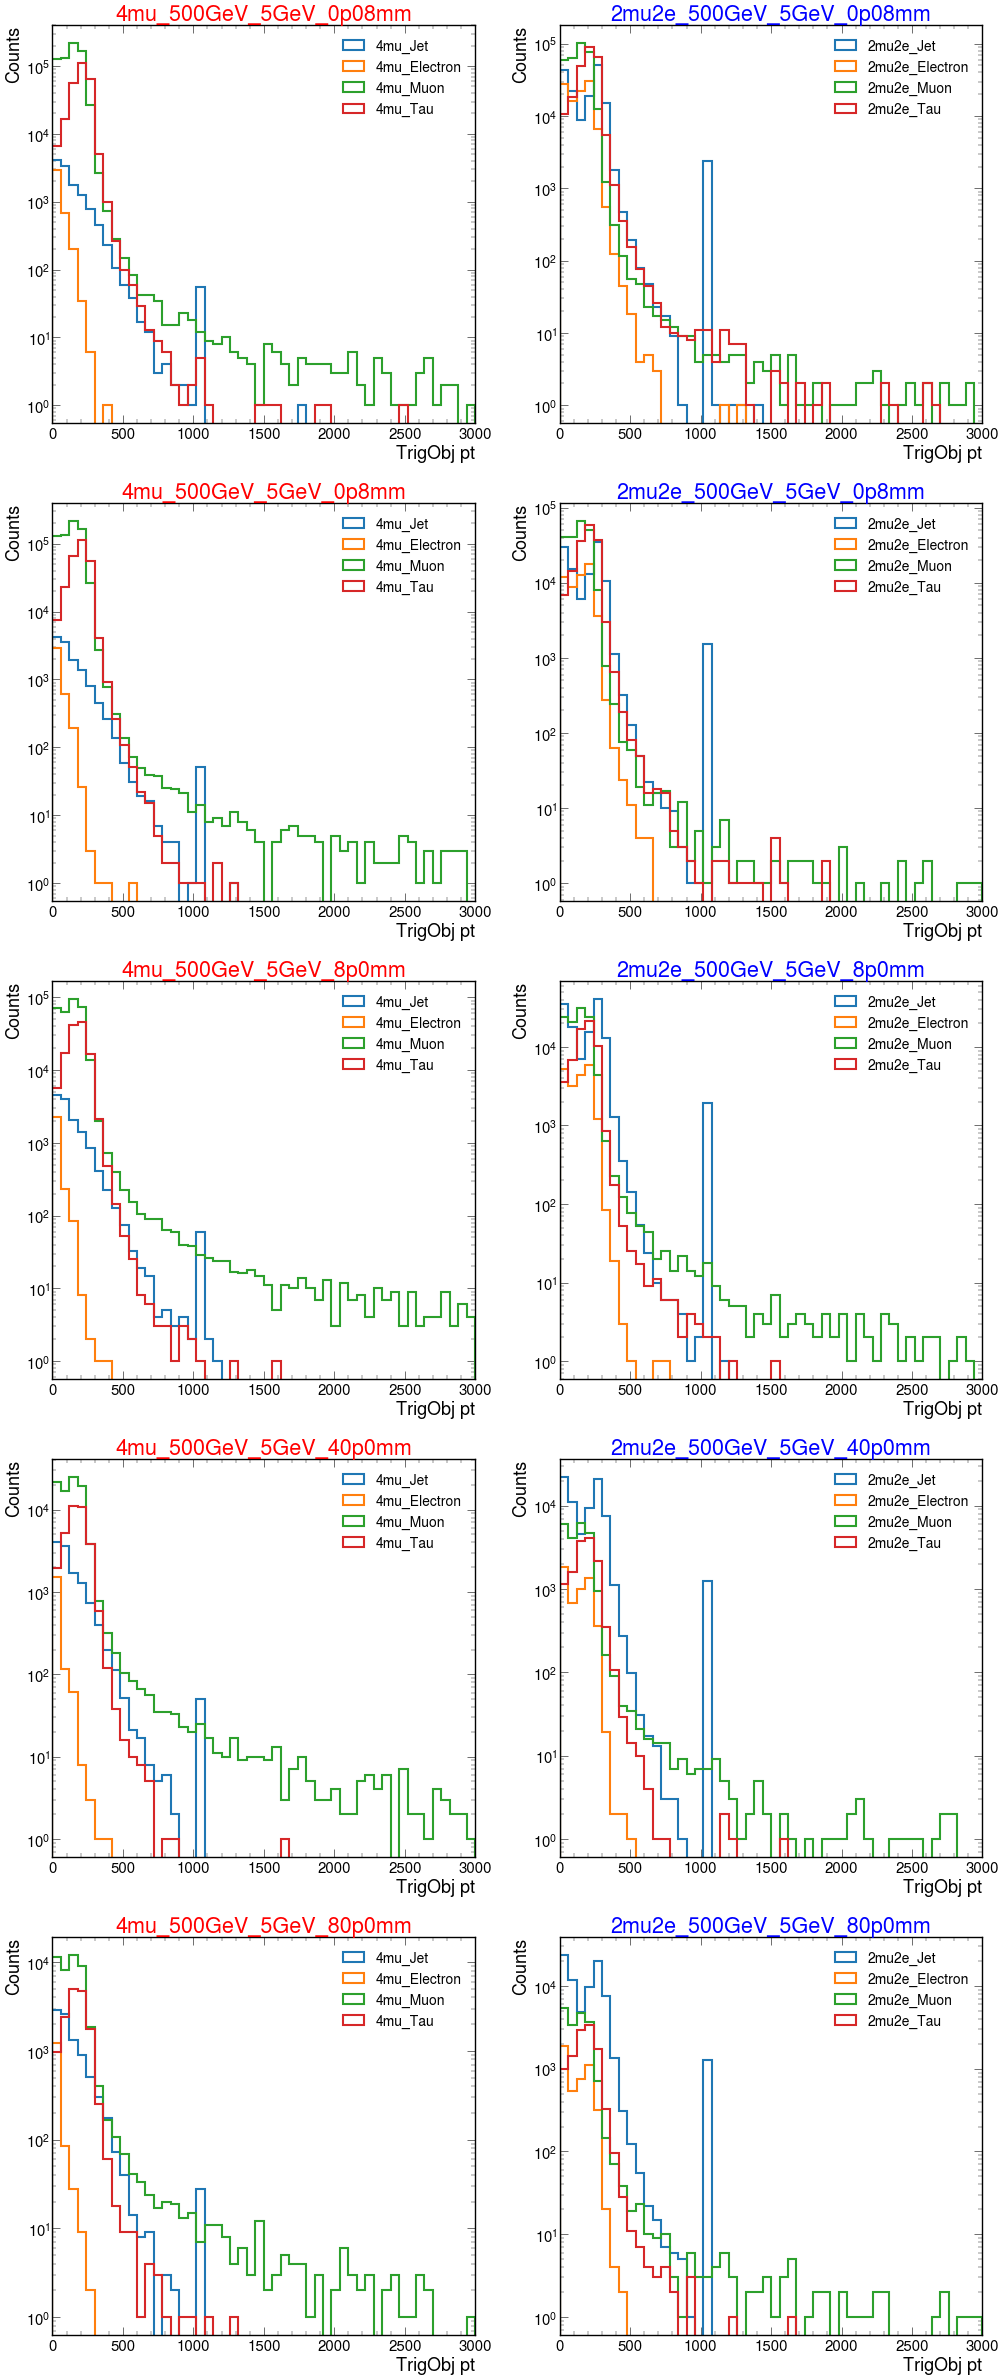

In [80]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,0,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,1,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,2,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,3,0,1,0,3000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.pt,v2.pt,v3.pt,v4.pt,v5.pt,v6.pt,v7.pt,v8.pt,4,0,1,0,3000)

label('pt')

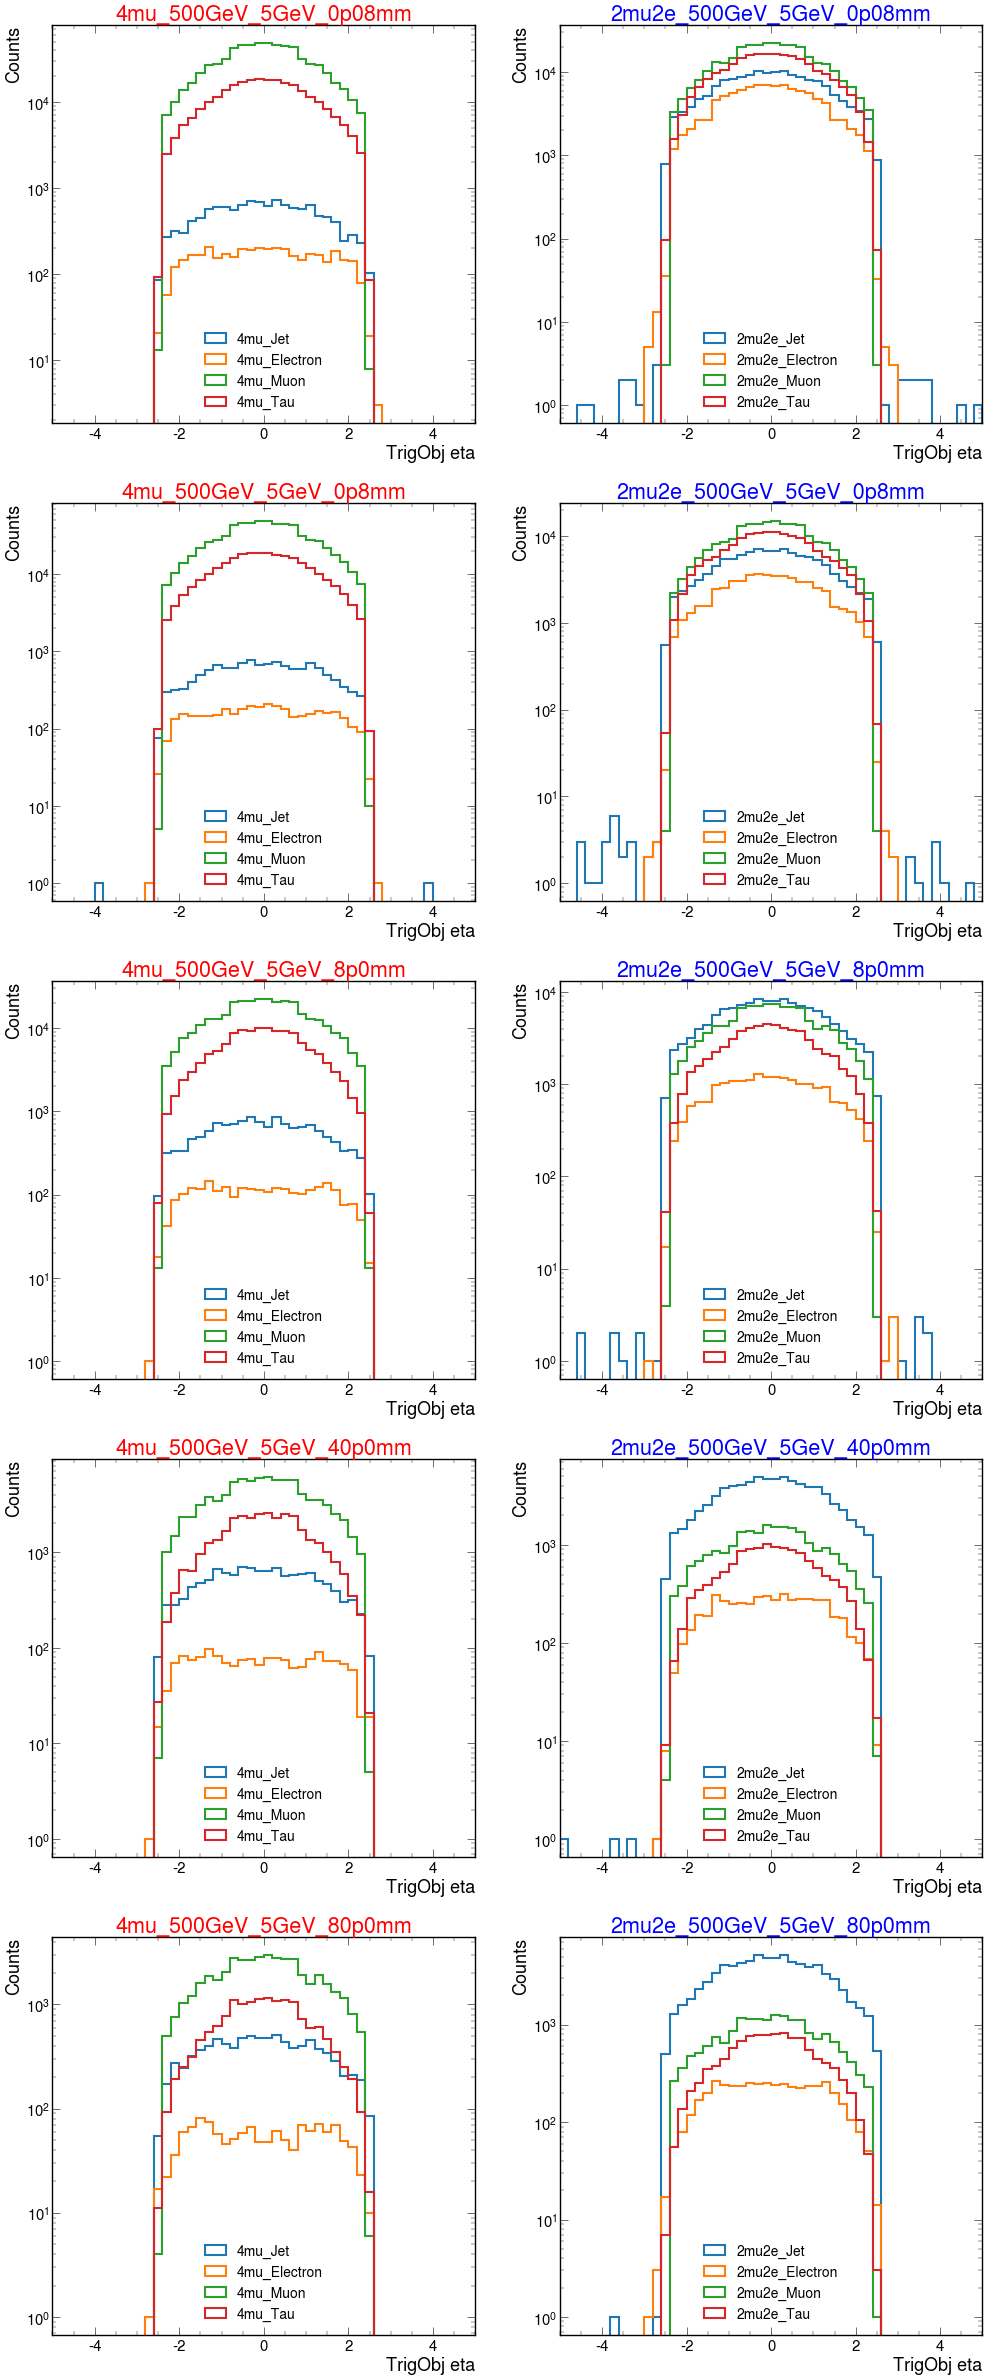

In [79]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,0,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,1,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,2,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,3,0,1,-5,5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.eta,v2.eta,v3.eta,v4.eta,v5.eta,v6.eta,v7.eta,v8.eta,4,0,1,-5,5)

label('eta')

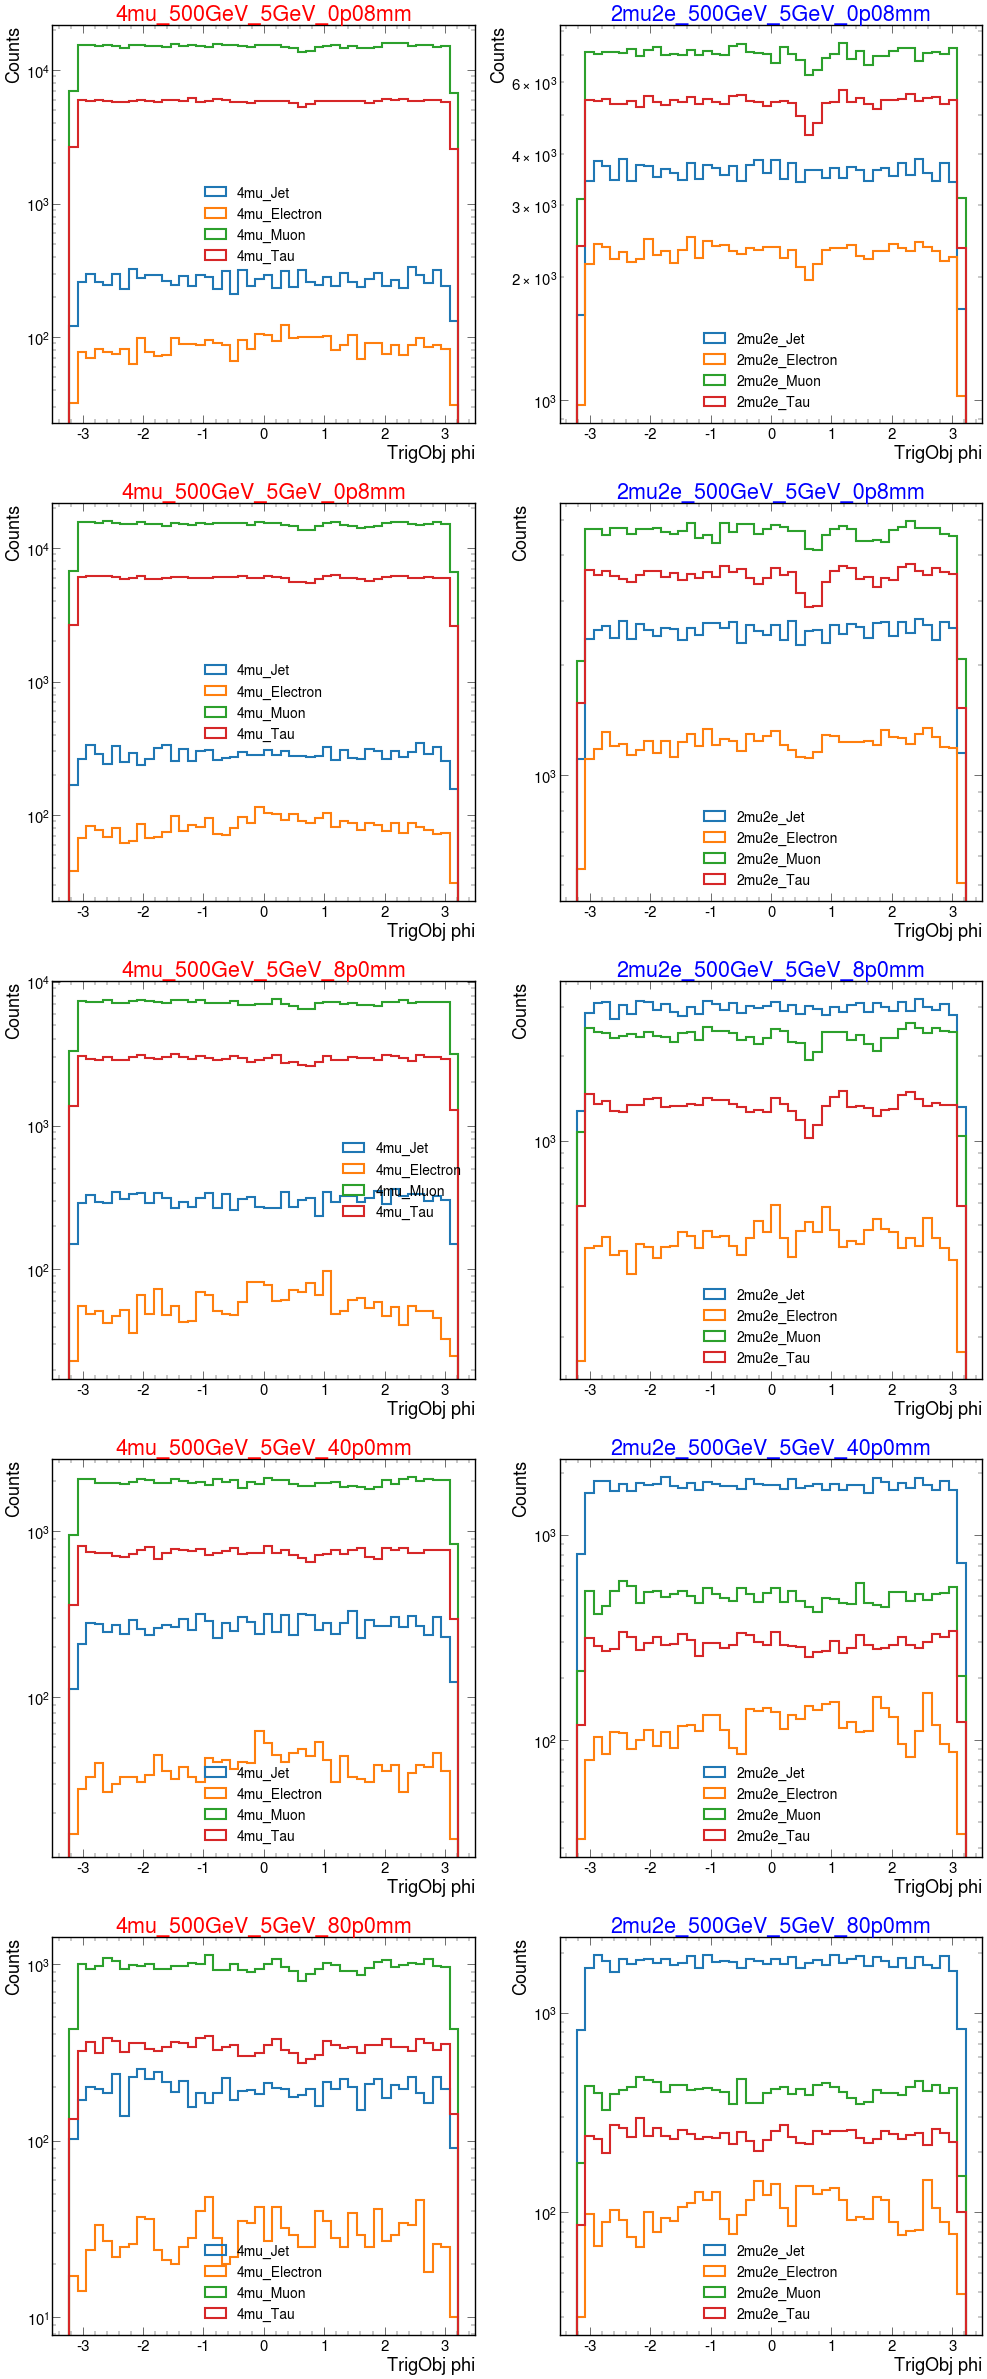

In [81]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,0,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,1,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,2,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,3,0,1,-3.5,3.5)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.phi,v2.phi,v3.phi,v4.phi,v5.phi,v6.phi,v7.phi,v8.phi,4,0,1,-3.5,3.5)

label('phi')

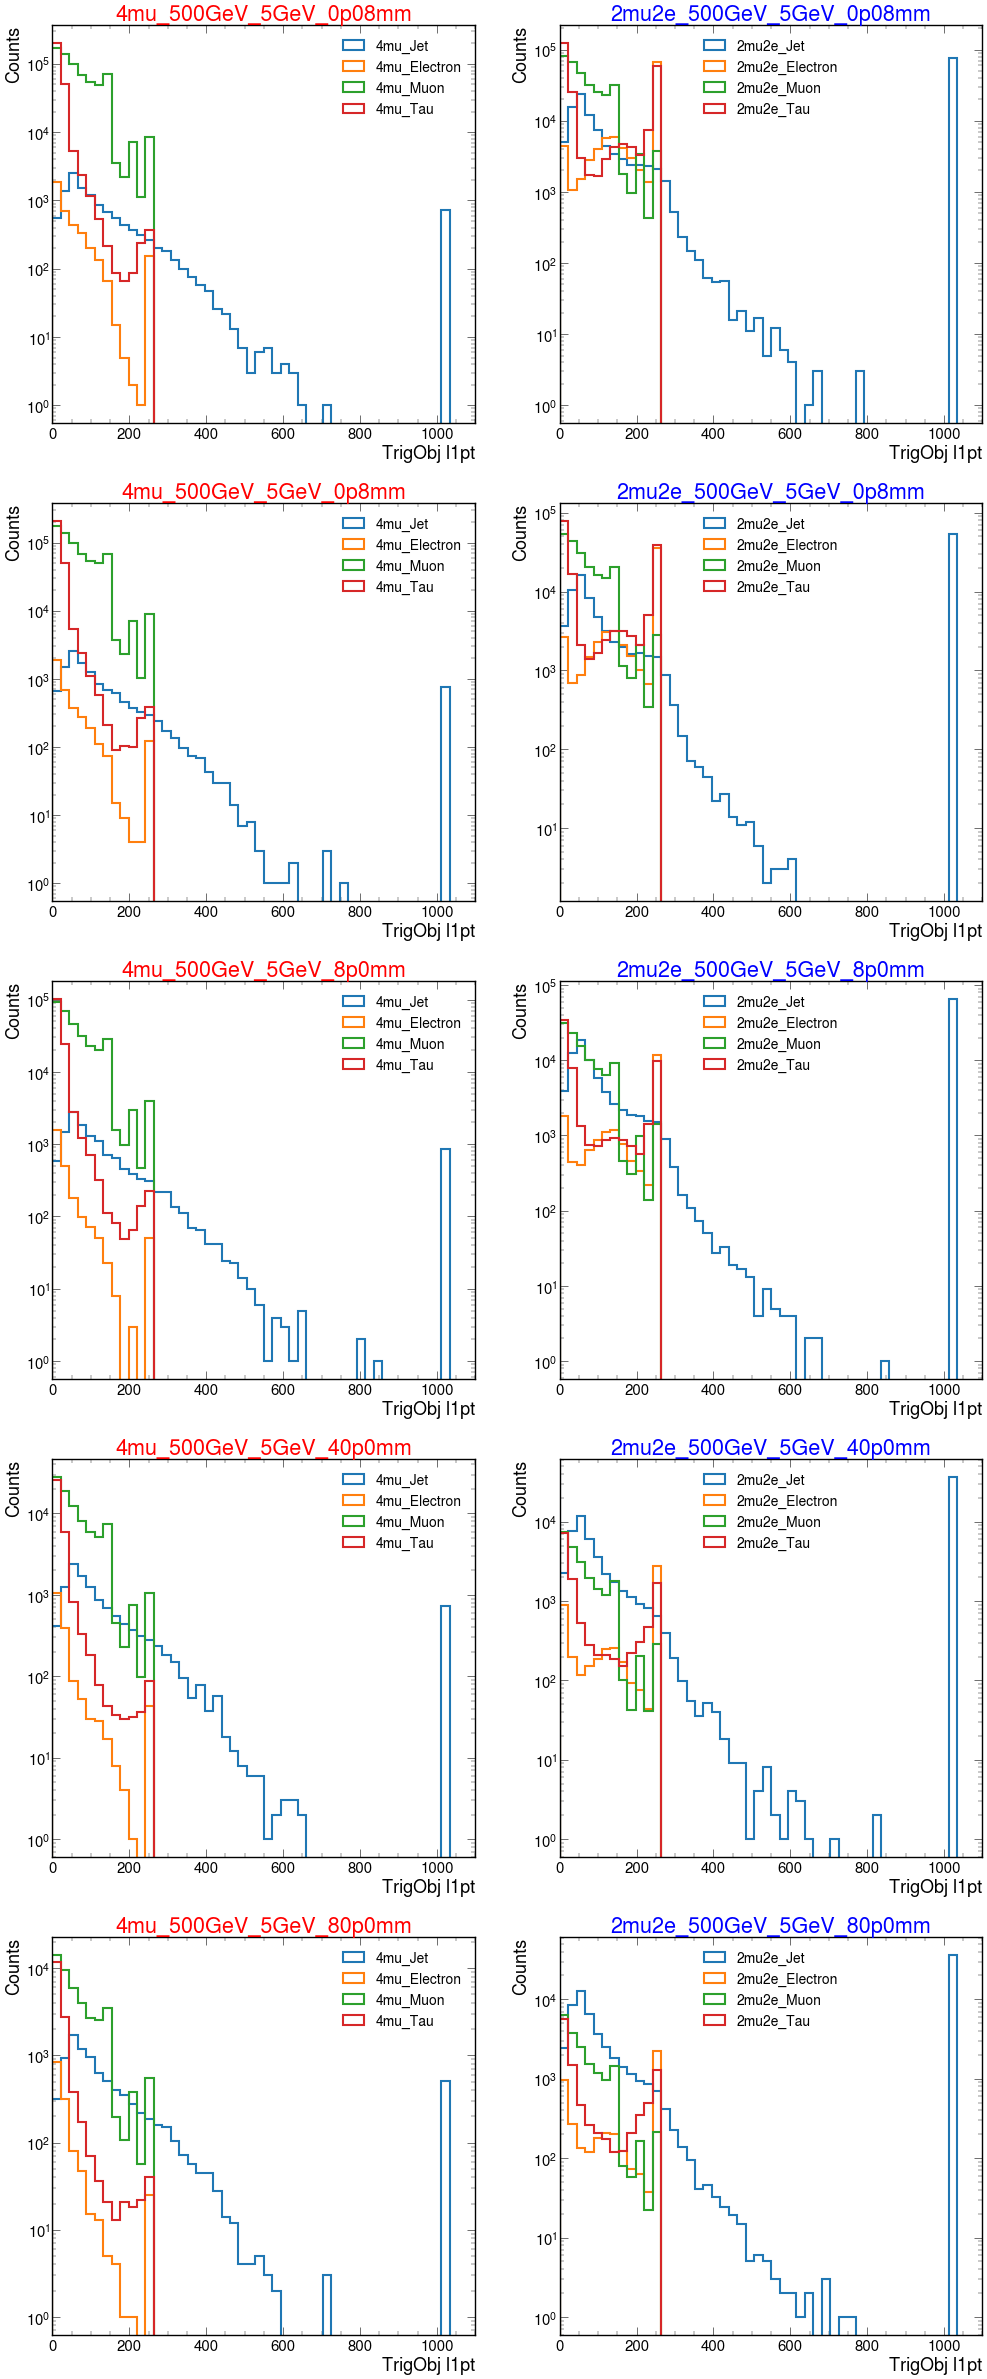

In [84]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,0,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,1,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,2,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,3,0,1,0,1100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1pt,v2.l1pt,v3.l1pt,v4.l1pt,v5.l1pt,v6.l1pt,v7.l1pt,v8.l1pt,4,0,1,0,1100)

label('l1pt')

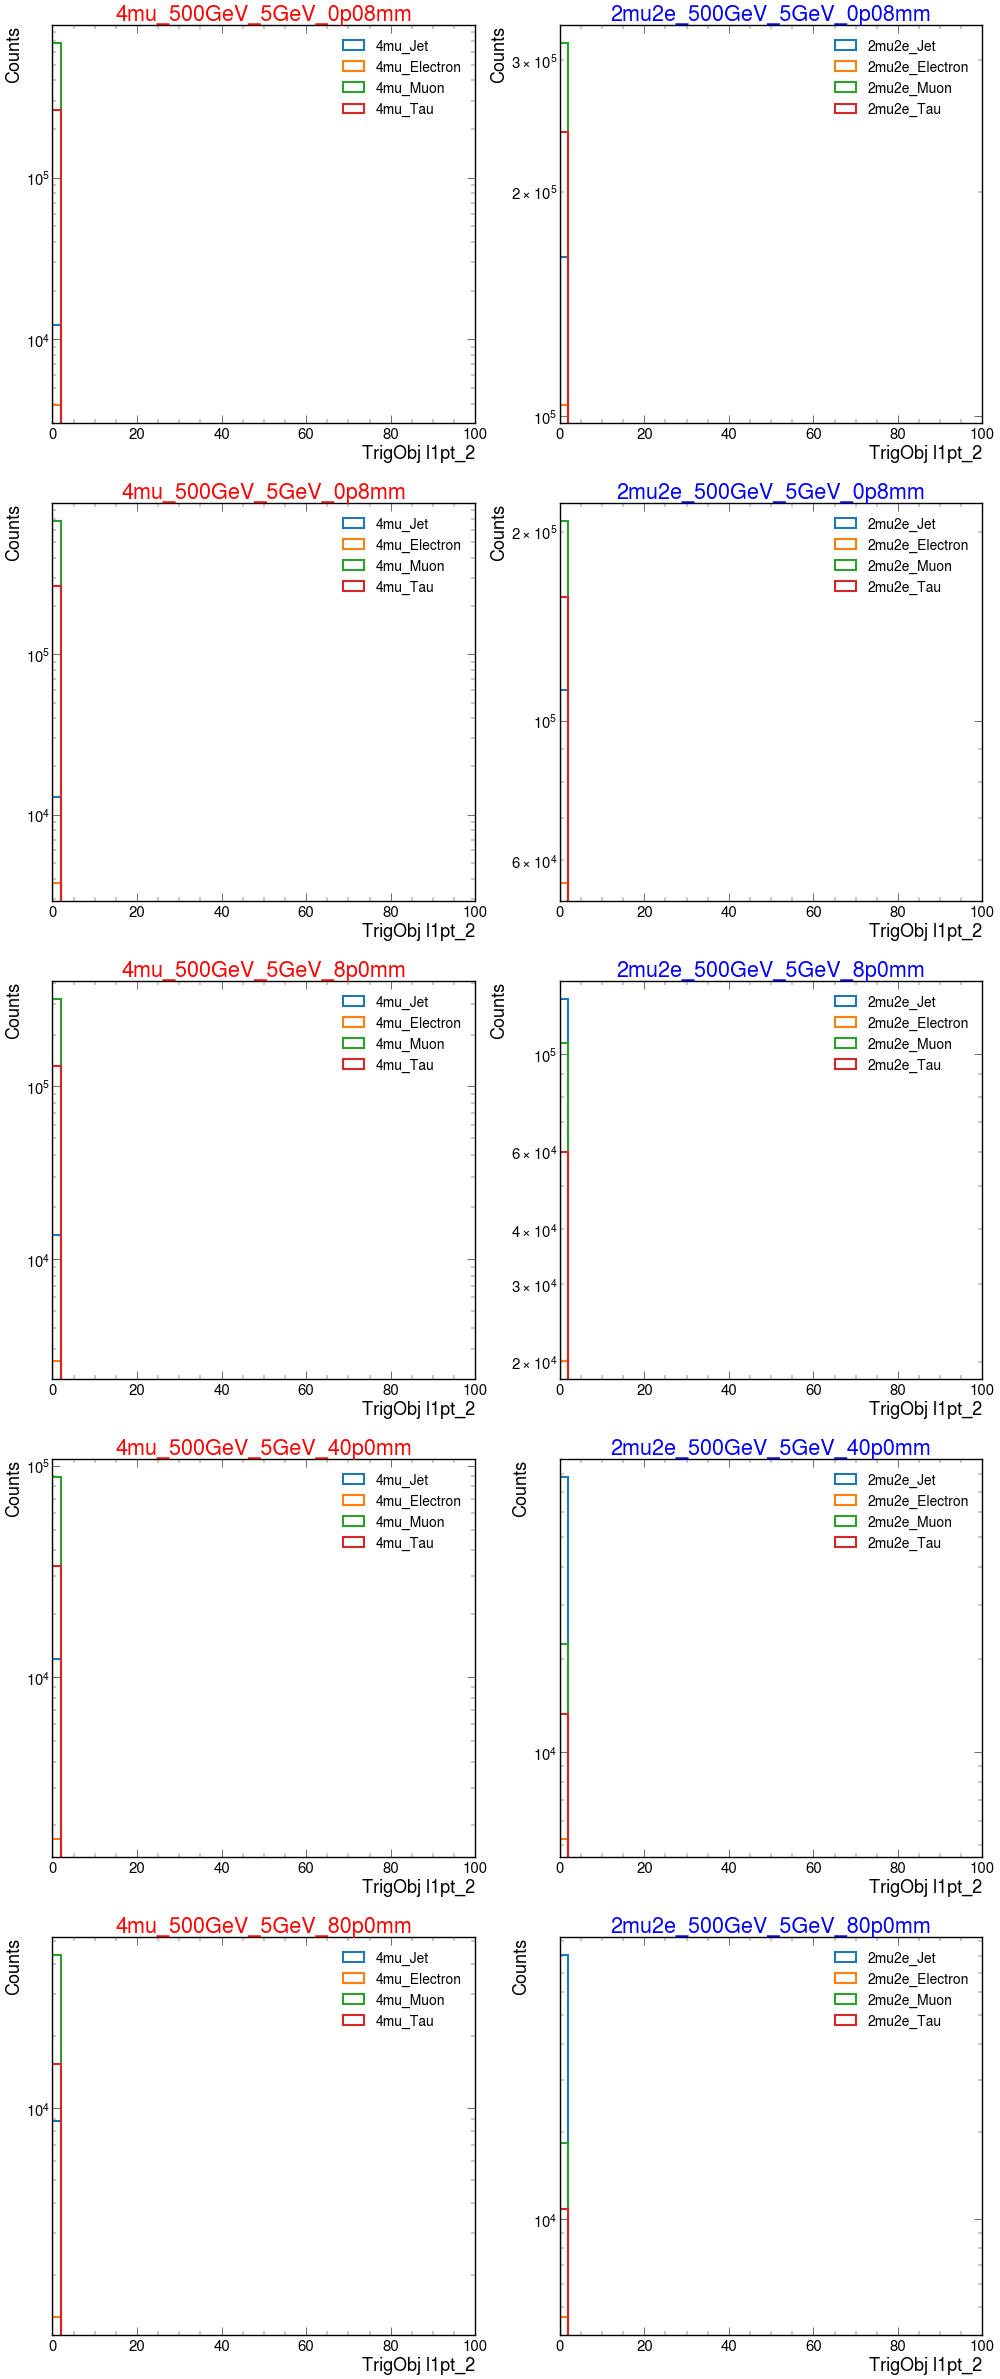

In [86]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,0,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,1,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,2,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,3,0,1,0,100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1pt_2,v2.l1pt_2,v3.l1pt_2,v4.l1pt_2,v5.l1pt_2,v6.l1pt_2,v7.l1pt_2,v8.l1pt_2,4,0,1,0,100)

label('l1pt_2')

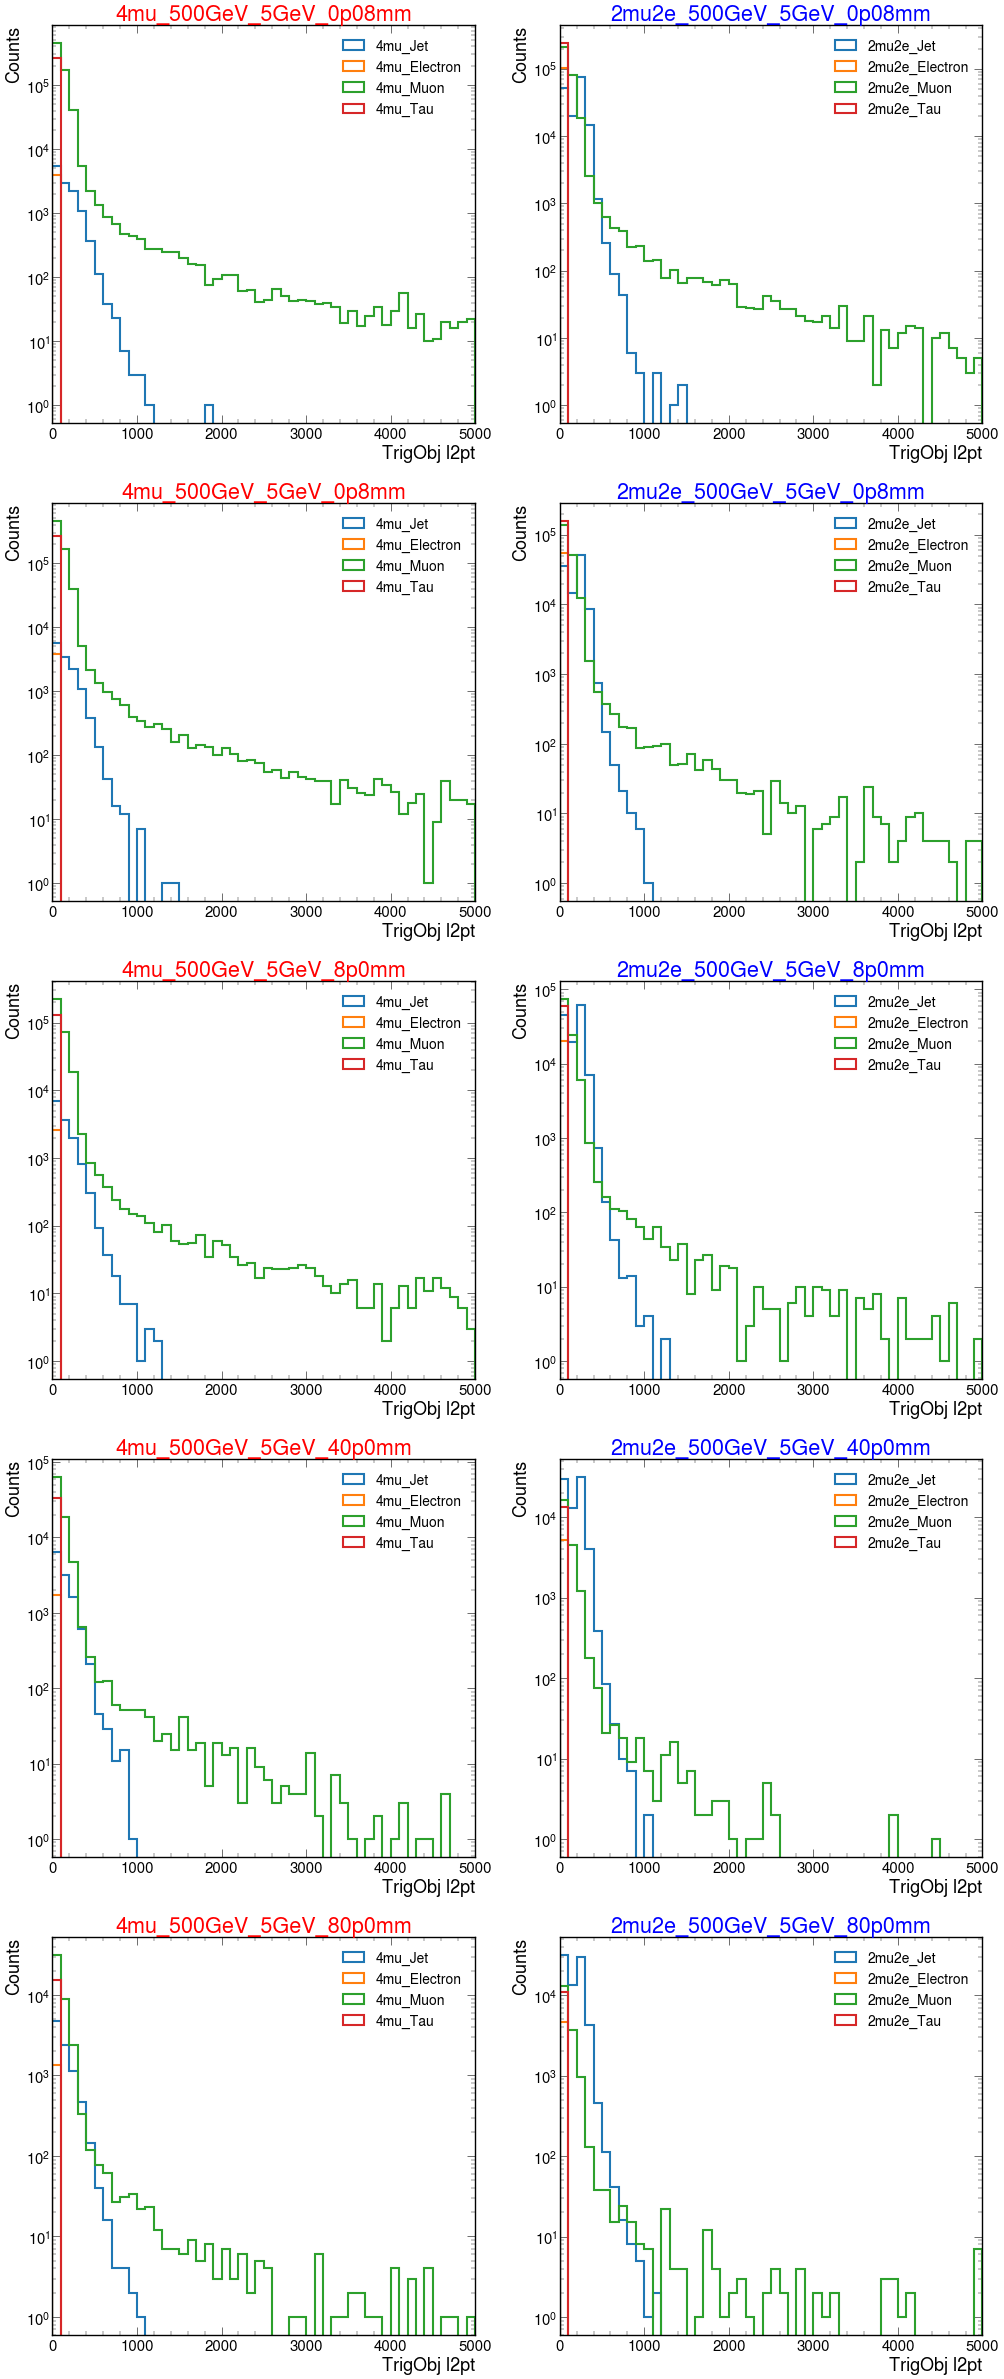

In [87]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,0,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,1,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,2,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,3,0,1,0,5000)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l2pt,v2.l2pt,v3.l2pt,v4.l2pt,v5.l2pt,v6.l2pt,v7.l2pt,v8.l2pt,4,0,1,0,5000)

label('l2pt')

4mu pdgId structure: [[3, 3, 3, 3, 3, 3, 0, 1], [3, 3, 3, 3, 3, ... 3, 3, 1, 1], [3, 3, 3, 3, 3, 1, 1, 1]]
2mu2e pdgId structure: [[3, 1], [3, 3, 3, 3, 0, 0, 0, 1, 1], ... 1, 1], [3, 3, 3, 3, 3, 0, 0, 1, 1, 1]]
4mu pdgId structure: [[3, 3, 3, 3, 3, 1, 1, 1], [3, 3, 3, 3, 3, ... 3, 3, 3, 1, 0], [3, 3, 3, 3, 3, 1, 1]]
2mu2e pdgId structure: [[3, 3, 3, 1, 1, 1, 1], [3, 3, 0, 0, 0, 1, ... 0, 0, 1, 1, 1], [3, 3, 3, 3, 1, 0, 1]]
4mu pdgId structure: [[3, 3, 3, 3, 1, 0, 1], [], [3, 3, 3, 3, 3, ... 3, 3, 3, 3, 3, 0, 1], [3], [3, 3, 0]]
2mu2e pdgId structure: [[3, 3, 0, 0, 0, 0], [0, 0], [3], [0, 0, ... [], [3, 1, 1, 1], [3, 3, 0, 0, 0, 1]]
4mu pdgId structure: [[3, 0], [], [], [], [3, 3, 3], [3, 3, 0, ... [], [], [], [3, 3, 1], [], [0, 3], []]
2mu2e pdgId structure: [[0, 0], [3, 3, 3, 3, 0], [0], [0], [0, ... [], [0, 0], [3, 3, 3, 3, 0, 0], [0, 0]]
4mu pdgId structure: [[], [], [], [], [3, 3, 0], [], [], [3, 3, ... [], [], [], [], [], [], [3], [], []]
2mu2e pdgId structure: [[], [], [0, 0], [0

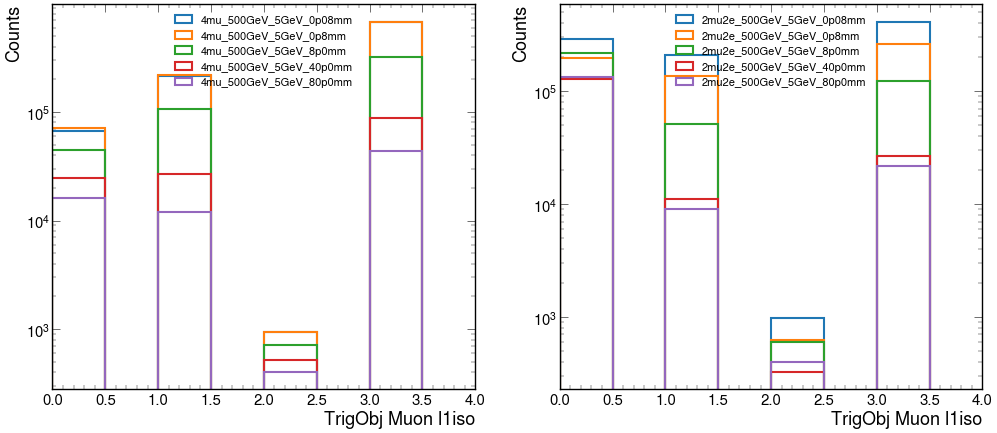

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].l1iso, events_2mu2e[i_2mu].l1iso)
    
    test1 = (events_4mu[i_4mu].id == 13)
    test2 = (events_2mu2e[i_2mu].id == 13)
    
    ax[0].hist(ak.flatten(events_4mu[i_4mu].l1iso), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].l1iso), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_xlabel('TrigObj Muon l1iso')
ax[1].set_xlabel('TrigObj Muon l1iso')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)

plt.savefig("../Plots/V2/TrigObj_muon/l1iso.png", bbox_inches="tight")

In [88]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=8, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

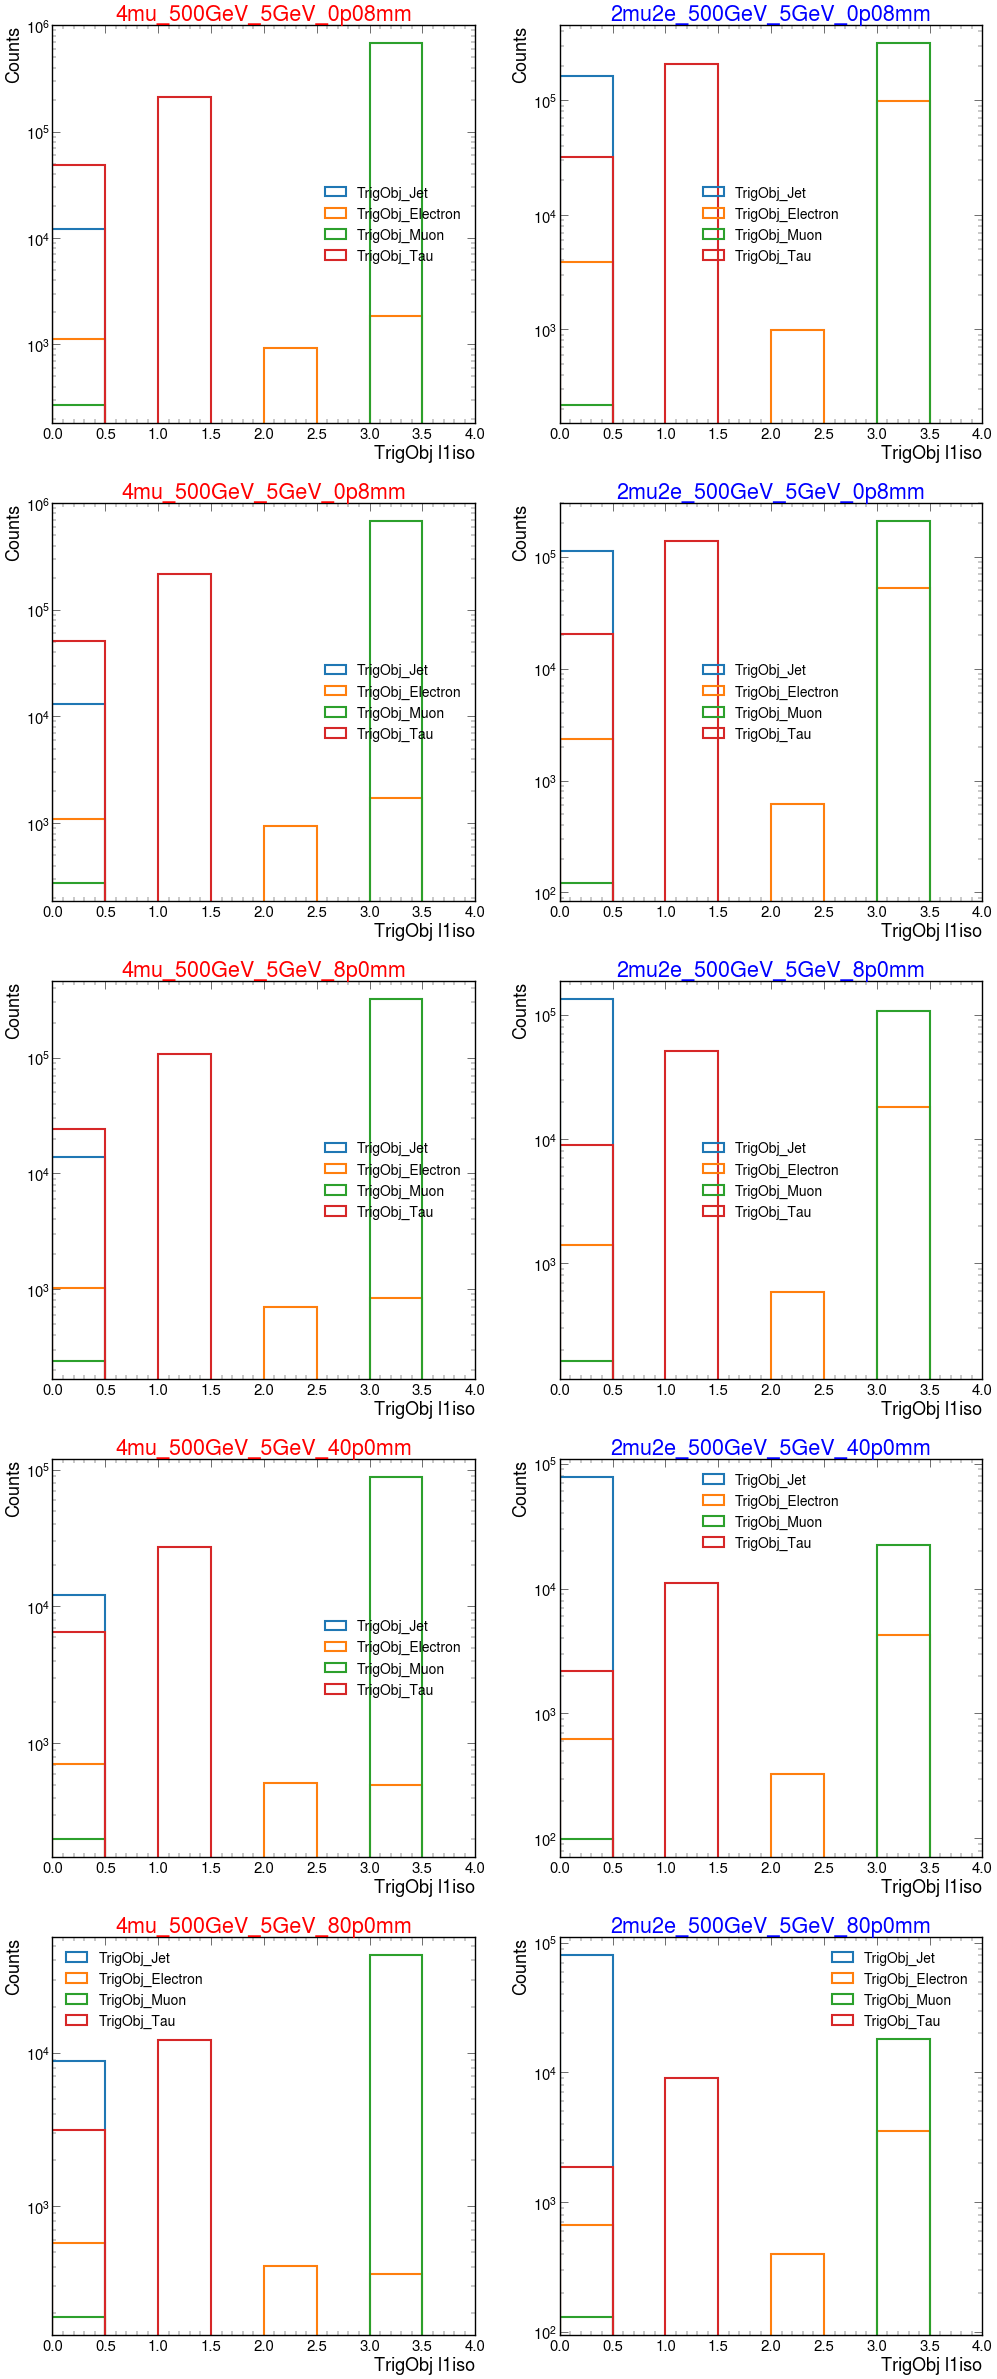

In [89]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,0,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,1,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,2,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,3,0,1,0,4)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1iso,v2.l1iso,v3.l1iso,v4.l1iso,v5.l1iso,v6.l1iso,v7.l1iso,v8.l1iso,4,0,1,0,4)

label('l1iso')

In [90]:
def plotting(v1,v2,v3,v4,v5,v6,v7,v8,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][j].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][k].hist(ak.flatten(v5), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Jet')
    ax[i][k].hist(ak.flatten(v6), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v7), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v8), range=(r1,r2), alpha=1, bins=6, histtype='step', linewidth=3, label='TrigObj_Tau')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

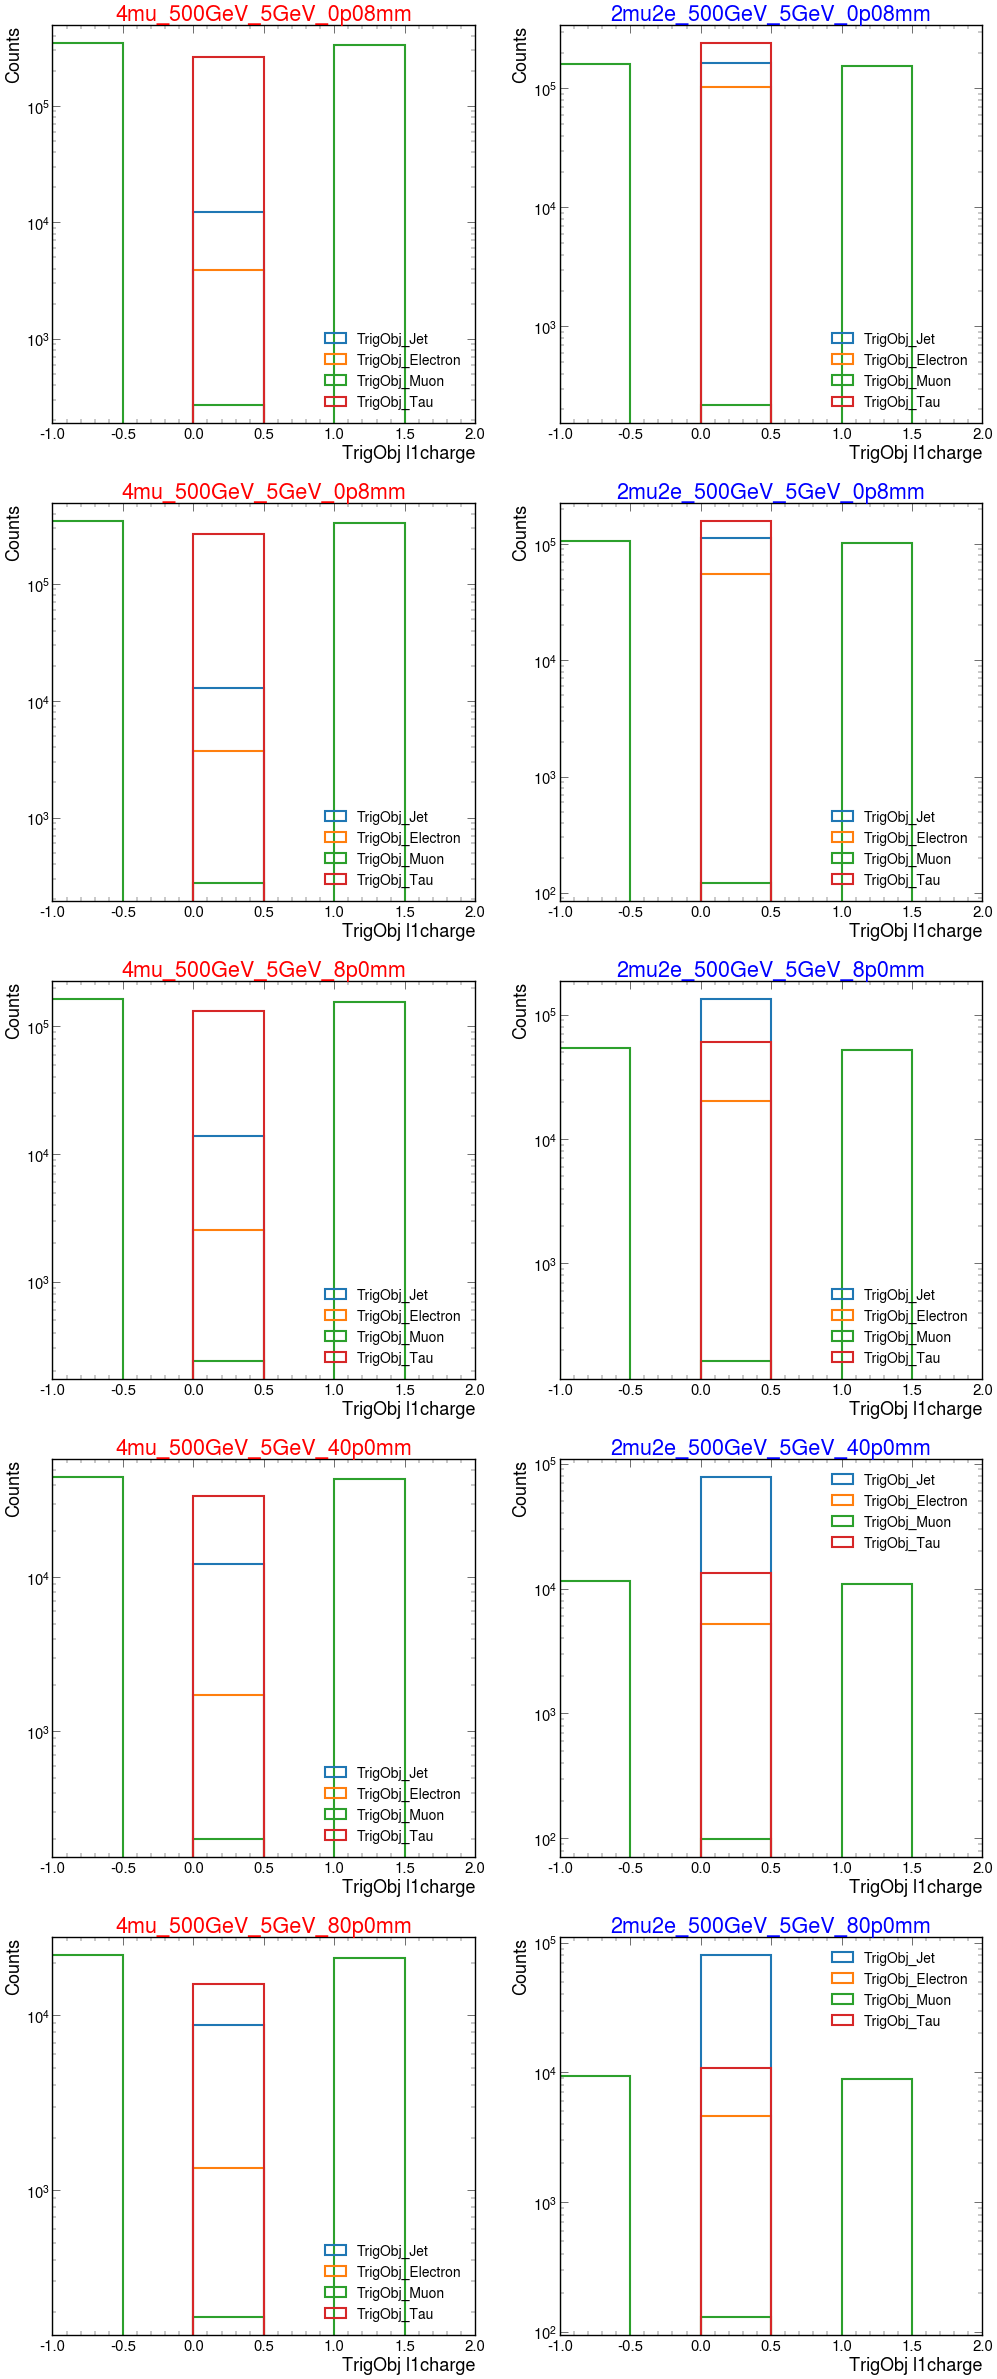

In [91]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,0,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,1,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,2,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,3,0,1,-1,2)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v1.l1charge,v2.l1charge,v3.l1charge,v4.l1charge,v5.l1charge,v6.l1charge,v7.l1charge,v8.l1charge,4,0,1,-1,2)

label('l1charge')

In [10]:
def plotting(v1,v2,v3,v4,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][j].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Muon')
    
    ax[i][k].hist(ak.flatten(v3), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Electron')
    ax[i][k].hist(ak.flatten(v4), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Muon')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

In [28]:
ak.max(v3.filterBits)

4026

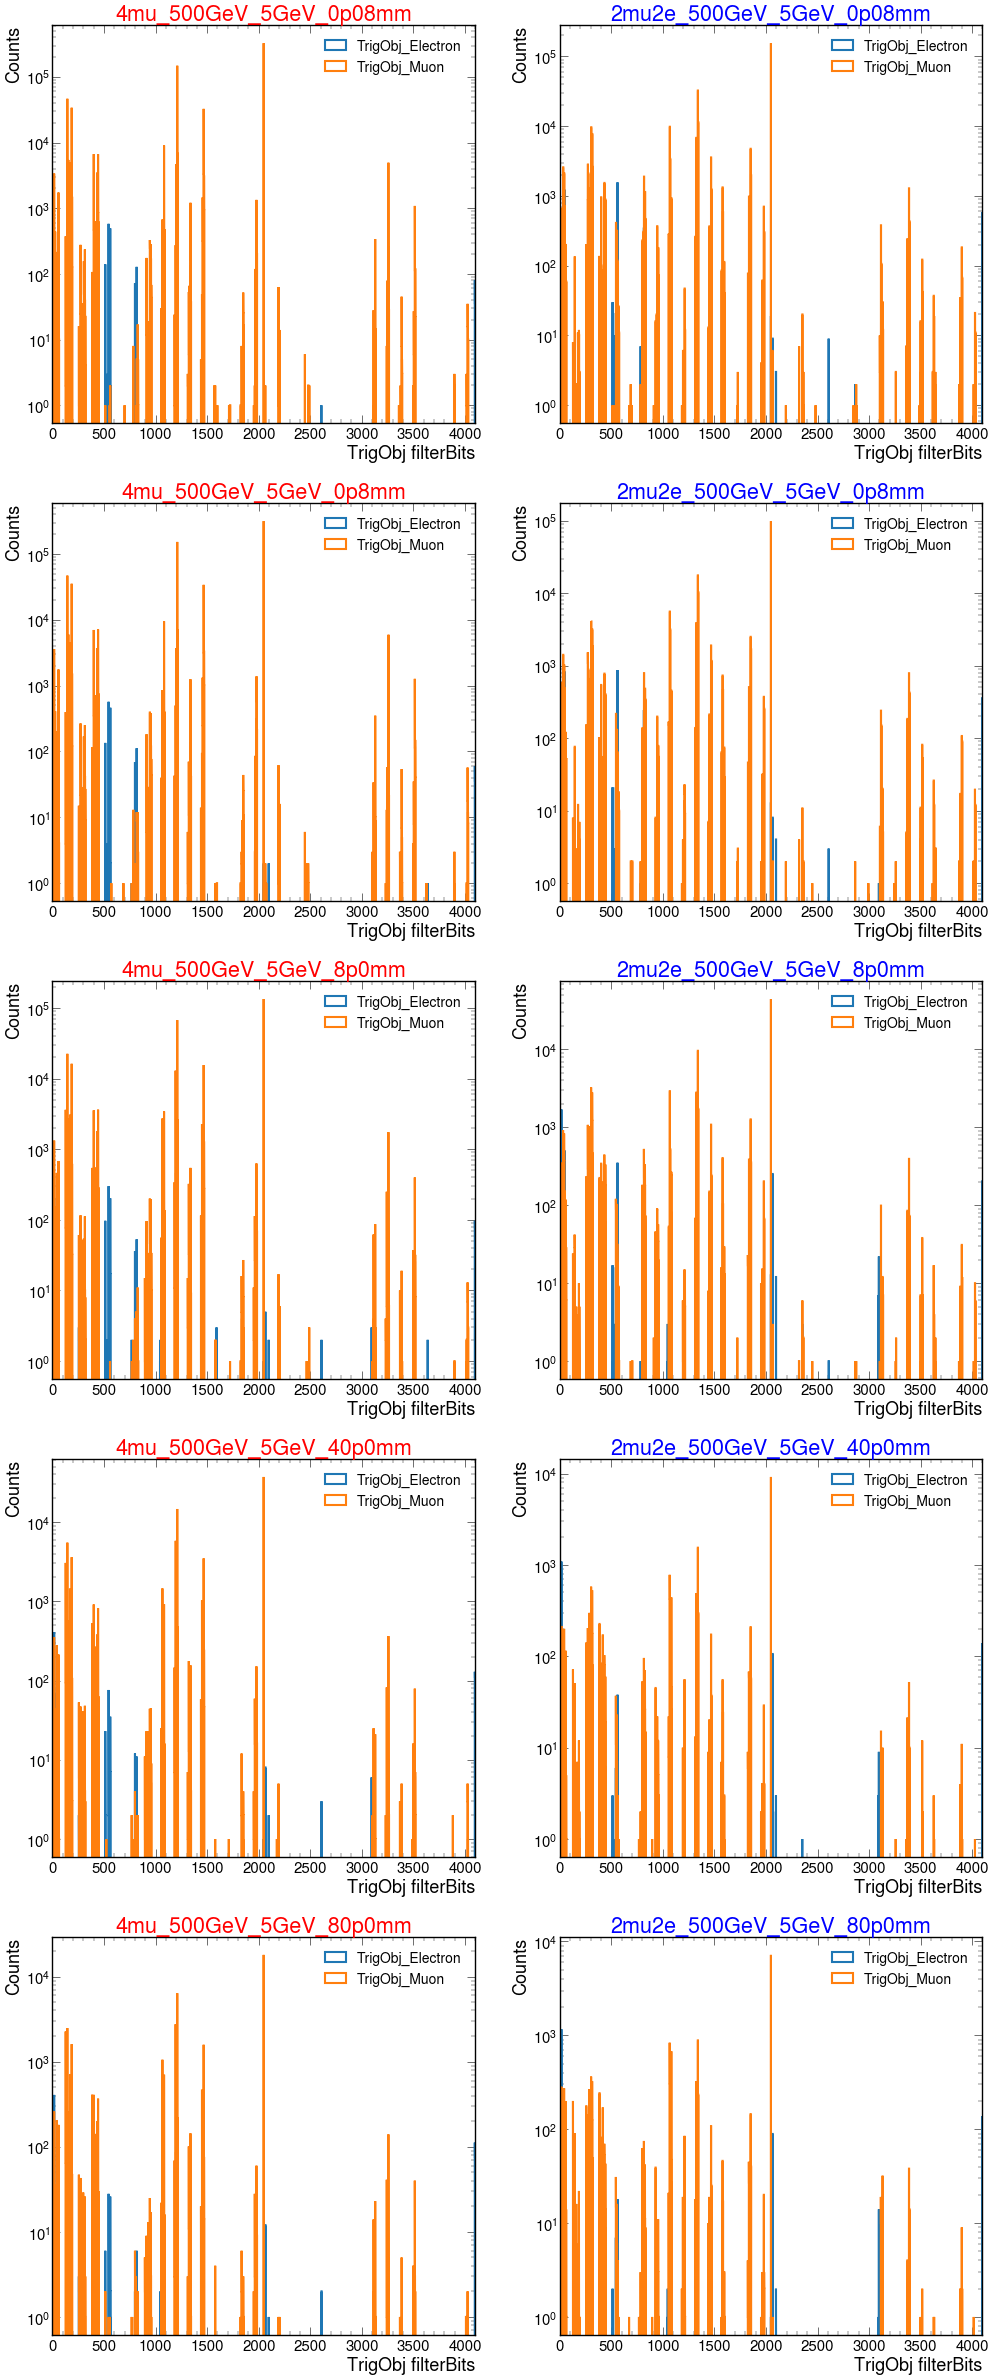

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v2.filterBits,v3.filterBits,v6.filterBits,v7.filterBits,0,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v2.filterBits,v3.filterBits,v6.filterBits,v7.filterBits,1,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v2.filterBits,v3.filterBits,v6.filterBits,v7.filterBits,2,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v2.filterBits,v3.filterBits,v6.filterBits,v7.filterBits,3,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v2.filterBits,v3.filterBits,v6.filterBits,v7.filterBits,4,0,1,0,4100)

label('filterBits')

In [13]:
def plotting(v1,v2,i,j,k,r1,r2):
    ax[i][j].hist(ak.flatten(v1), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Muon')
    ax[i][k].hist(ak.flatten(v2), range=(r1,r2), alpha=1, bins=4100, histtype='step', linewidth=3, label='TrigObj_Muon')
    
    ax[i][j].set_xlim(r1,r2)
    ax[i][j].set_ylabel('Counts')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=20)
    
    ax[i][k].set_xlim(r1,r2)
    ax[i][k].set_ylabel('Counts')
    ax[i][k].set_yscale("log")
    ax[i][k].legend(fontsize=20)

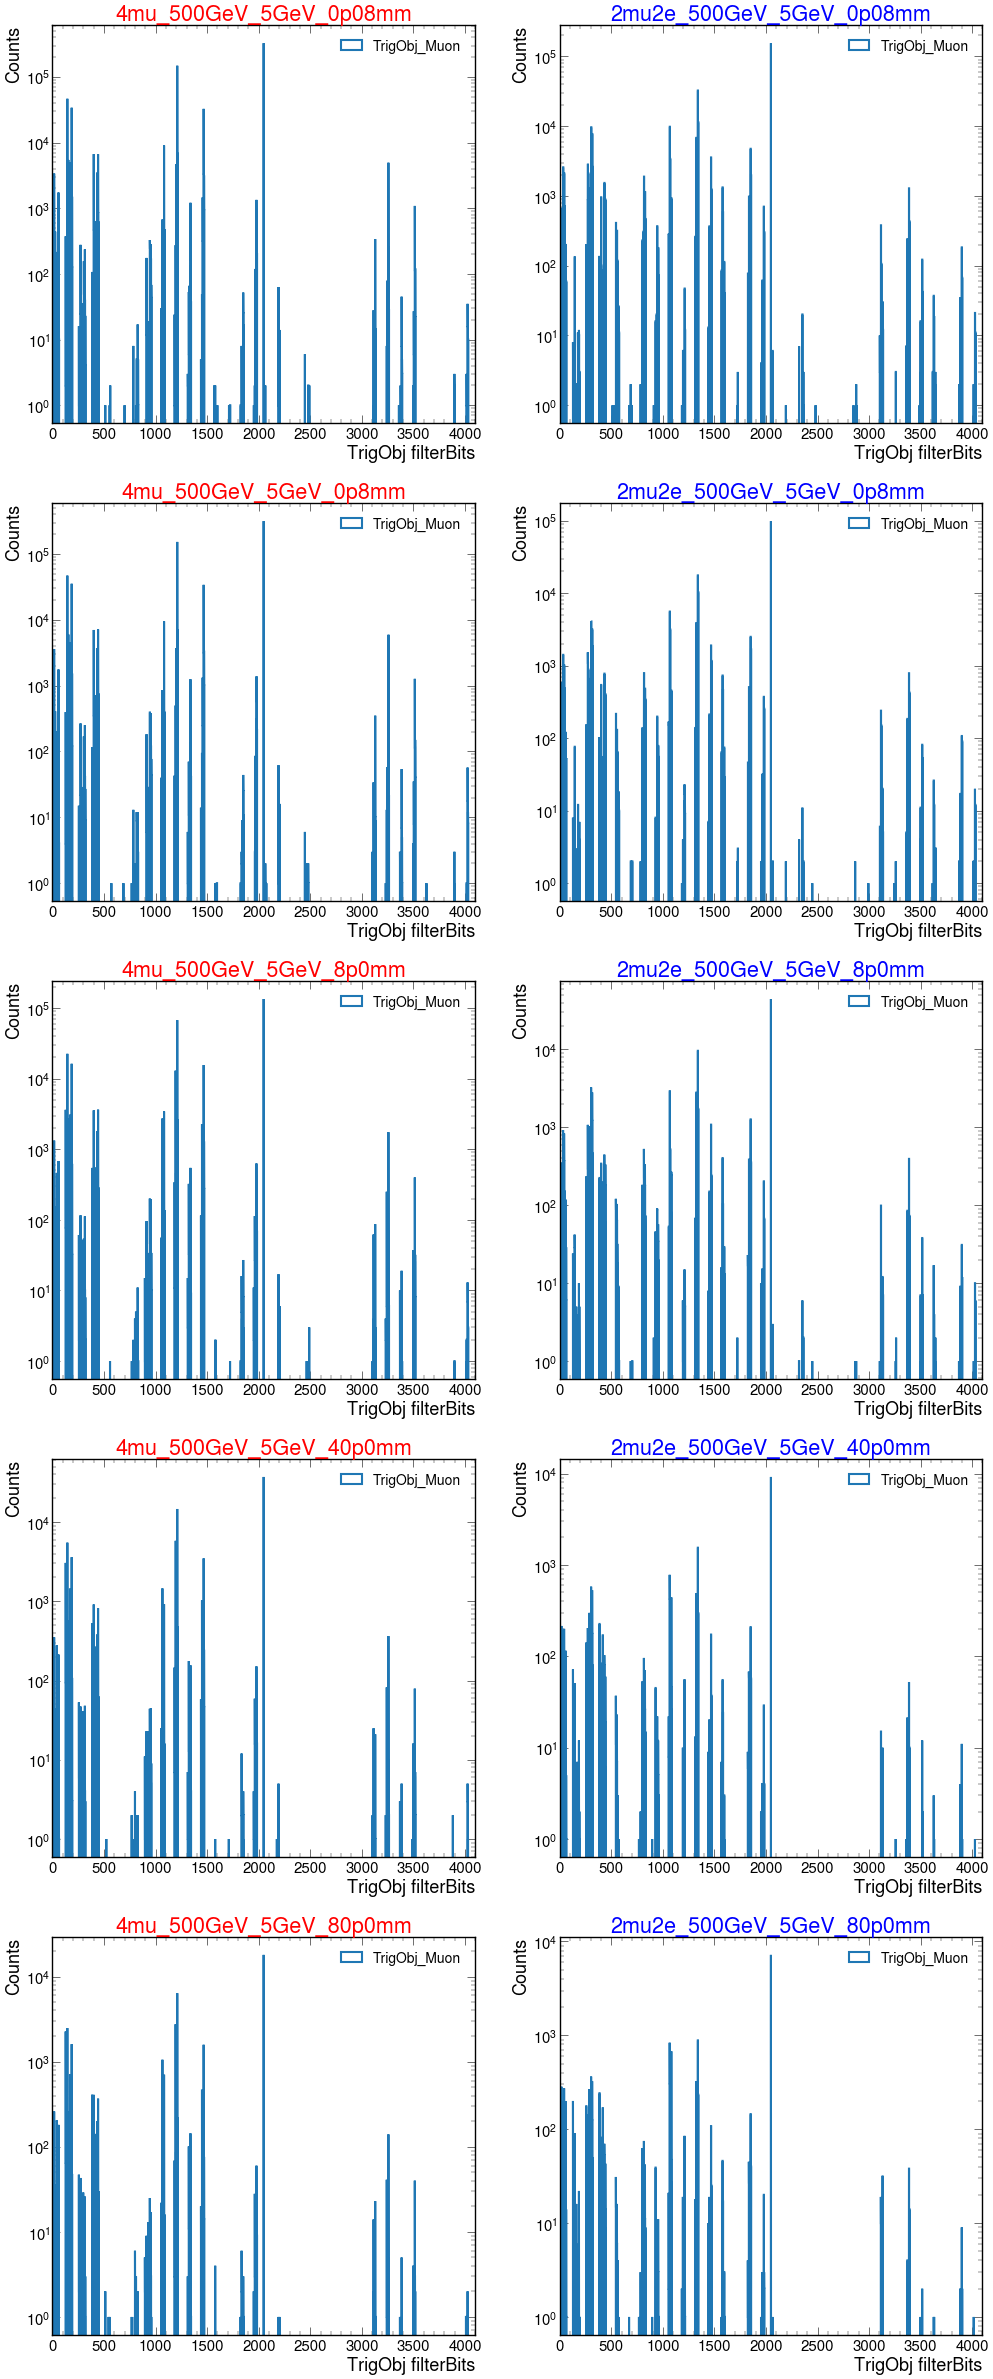

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(5, 2, figsize=(24,60))

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p08mm')
plotting(v3.filterBits,v7.filterBits,0,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_0p8mm')
plotting(v3.filterBits,v7.filterBits,1,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_8p0mm')
plotting(v3.filterBits,v7.filterBits,2,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_40p0mm')
plotting(v3.filterBits,v7.filterBits,3,0,1,0,4100)

v1,v2,v3,v4,v5,v6,v7,v8 = data('4mu_500GeV_5GeV_80p0mm', '2mu2e_500GeV_5GeV_80p0mm')
plotting(v3.filterBits,v7.filterBits,4,0,1,0,4100)

label('filterBits')

In [24]:
def data_4mu(c1,c2,c3,c4,c5):
    mu1, mu2, mu3, mu4, mu5 = (events_4mu[c1].id == 13), (events_4mu[c2].id == 13), (events_4mu[c3].id == 13), (events_4mu[c4].id == 13), (events_4mu[c5].id == 13)
    
    return events_4mu[c1][mu1], events_4mu[c2][mu2], events_4mu[c3][mu3], events_4mu[c4][mu4], events_4mu[c5][mu5]

In [25]:
def data_2mu(c6,c7,c8,c9,c10):
    mu6, mu7, mu8, mu9, mu10 =  (events_2mu2e[c6].id ==13), (events_2mu2e[c7].id ==13), (events_2mu2e[c8].id ==13), (events_2mu2e[c9].id ==13), (events_2mu2e[c10].id ==13)
    
    return events_2mu2e[c6][mu6], events_2mu2e[c7][mu7], events_2mu2e[c8][mu8], events_2mu2e[c9][mu9], events_2mu2e[c10][mu10]

In [26]:
import pandas as pd

In [27]:
index_4mu, binum_4mu, len1, len2, len3, len4, len5 = [],[],[],[],[],[],[]

for i in tqdm(range(0,4096)):
    
    v1,v2,v3,v4,v5 = data_4mu('4mu_500GeV_5GeV_0p08mm', '4mu_500GeV_5GeV_0p8mm', '4mu_500GeV_5GeV_8p0mm', '4mu_500GeV_5GeV_40p0mm', '4mu_500GeV_5GeV_80p0mm')   
    
    mask1 = v1.filterBits == i
    mask2 = v2.filterBits == i   
    mask3 = v3.filterBits == i
    mask4 = v4.filterBits == i 
    mask5 = v5.filterBits == i
    
    
    if len(ak.flatten(v1.filterBits[mask1])) != 0 or len(ak.flatten(v2.filterBits[mask2])) != 0 or len(ak.flatten(v3.filterBits[mask3])) != 0 or len(ak.flatten(v4.filterBits[mask4])) != 0 or len(ak.flatten(v5.filterBits[mask5])) != 0: 
        
        binary_num = bin(i)[2:]
        
        index_4mu.append(i)
        binum_4mu.append(binary_num)
        len1.append(len(ak.flatten(v1.filterBits[mask1])))
        len2.append(len(ak.flatten(v2.filterBits[mask2])))
        len3.append(len(ak.flatten(v3.filterBits[mask3])))
        len4.append(len(ak.flatten(v4.filterBits[mask4])))
        len5.append(len(ak.flatten(v5.filterBits[mask5]))) 
        
data_4mu = {
    "index": index_4mu,
    "binum": binum_4mu,
    "len1": len1,
    "len2": len2,
    "len3": len3,
    "len4": len4,
    "len5": len5,
}

df_4mu = pd.DataFrame(data_4mu)
df_4mu.to_csv('4mu.csv', index=False)

  0%|          | 0/4096 [00:00<?, ?it/s]

In [29]:
index_2mu, binum_2mu, len6, len7, len8, len9, len10 = [],[],[],[],[],[],[]

for i in tqdm(range(0,4096)):
    v6,v7,v8,v9,v10 = data_2mu('2mu2e_500GeV_5GeV_0p08mm', '2mu2e_500GeV_5GeV_0p8mm', '2mu2e_500GeV_5GeV_8p0mm', '2mu2e_500GeV_5GeV_40p0mm', '2mu2e_500GeV_5GeV_80p0mm')
    
    mask6 = v6.filterBits == i
    mask7 = v7.filterBits == i   
    mask8 = v8.filterBits == i
    mask9 = v9.filterBits == i 
    mask10 = v10.filterBits == i
    
    if len(ak.flatten(v6.filterBits[mask6])) != 0 or len(ak.flatten(v7.filterBits[mask7])) != 0 or len(ak.flatten(v8.filterBits[mask8])) != 0 or len(ak.flatten(v9.filterBits[mask9])) != 0 or len(ak.flatten(v10.filterBits[mask10])) != 0: 
        
        binary_num = bin(i)[2:]
        
        index_2mu.append(i)
        binum_2mu.append(binary_num)
        len6.append(len(ak.flatten(v6.filterBits[mask6])))
        len7.append(len(ak.flatten(v7.filterBits[mask7])))
        len8.append(len(ak.flatten(v8.filterBits[mask8])))
        len9.append(len(ak.flatten(v9.filterBits[mask9])))
        len10.append(len(ak.flatten(v10.filterBits[mask10])))    
        
data_2mu = {
    "index": index_2mu,
    "binum": binum_2mu,
    "len6": len6,
    "len7": len7,
    "len8": len8,
    "len9": len9,
    "len10": len10,
}

df_2mu = pd.DataFrame(data_2mu)
df_2mu.to_csv('2mu.csv', index=False)

  0%|          | 0/4096 [00:00<?, ?it/s]